In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def G(r,r_prime,phi, omega_0):
    dot =  np.einsum("ijk,i->jk",r, r_prime)
    return np.exp(phi)/(2*np.pi*np.sinh(phi)) * np.exp(-(np.square(np.linalg.norm(r, axis=0)) + np.square(np.linalg.norm(r_prime, axis=0)))/(omega_0**2*np.tanh(phi/2)) + 2*dot/(omega_0**2*np.sinh(phi/2)))

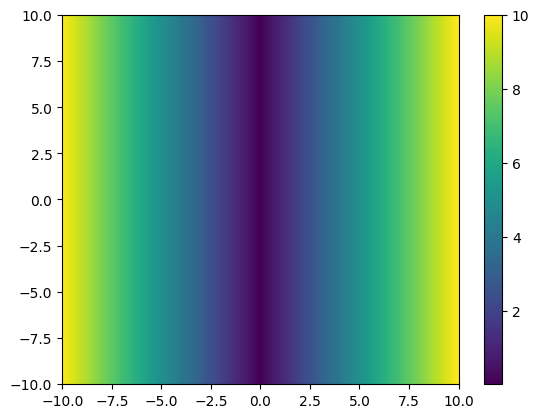

In [22]:
x = np.linspace(-10.0, 10.0, 500)
y = np.linspace(-10.0, 10.0, 500)
X,Y = np.meshgrid(x,y)
R = np.array([X,Y])

E = G(R, [1.0, 0.0], 1j*2*np.pi/3, 1.0)

plt.pcolor(X, Y, np.abs(E))
plt.colorbar()